# Homework 1

**Due date: Sunday, Esfand 24th, 23:59**

In this homework, we are going to have a bit of fun with word embeddings. We will see their usage, and develop our own Word Embeddings too.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated.**

This code requires some of the dependencies of the COLAB platform, you are free to use any other platform that supports jupyter notebooks, but there is no guarantee that the code snippets will work in your setting without some modifications. 

## Import the Required Libraries

Feel free to use any other library to your heart's content (unless specified by the question), but give a link to its documentations if it is not a well known one.

In [ ]:
import nltk 
import sklearn as sk
import numpy as np
import pandas as pd 
import tensorflow as tf

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm.notebook import tqdm

from IPython.display import clear_output

## Get the Data Ready

For this homework, we are going to use the Sentiment 140 dataset. This is a dataset containing almost 160,000 tweets from twitter.

To make your work easier, we download and load a portion of the dataset for you.

Run the cells below to download and extract the dataset. 

In [ ]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
!unzip trainingandtestdata.zip -d /content/Data
clear_output()

Run the cell below to prepare the data as a pandas dataframe.

In [ ]:
data = pd.read_csv('/content/Data/training.1600000.processed.noemoticon.csv', header = None, encoding = "ISO-8859-1")

Run the cell below to 


1.   Convert the text and the labels to numpy arrays
2.   Convert the labels to numeral integers
3.   Take only 40,000 of the data for easier processing





In [ ]:
data  = data.sample(frac = 0.25)
text_data = list(data[5])
label_list = list(data[0])
text_data = np.array(text_data)
label_list = np.array(label_list)

Now that we have loaded the data, we can start the fun part :)

## Exercise 1: Statistical Word Embeddings

In this exercise, we are going to attempt to make our very own word-embedding. Specifically, we will construct a co-occurrence word embedding. A co-occurrence word embedding is a type of word embedding in which for $N$ words, an $N \times N$ matrix is created with $n_{i,j}$ determining the number of times the word in position $i$ appears adjacent to the word in position $j$. 

### 1.1. Cleaning the dataset
First, in order to have a better performing model, we should clean our sentences as much as we can. This usually boils down to removing the punctuations, and uppercase words. 

Complete the function below such that given a numpy array (or list) of sentences, it returns another list of sentences such that the returned list has its punctuations removed, HTML tags removed, links removed, and upper case words converted to lower case. 

In [ ]:
def clean_sentences(list_of_sentences) : 
  #cleaned_sentences = ?  Write your code here
  return cleaned_sentences
#Give an example here that showcases the result of your code

Intuitively explain the reason behind removing the punctuations and converting the upper case words to lower case. What happens if we don't? Are there cases where it is better to leave the sentences as they are instead of attempting to clean them? 

Explain in terms of both the co-occurrence word embeddings and in a more general setting.

Type your answer here: 

### 1.2. Word Tokenization

in order to construct our word embedding, we need to tokenize the sentences. You will later use this function to tokenize the sentences of the dataset.

Complete the below function such that given a numpy array (or list) of sentences, it returns a list of lists where each list corresponds with a sentence and each element of it is a tokenized word. 

Example: Suppose that you you have the list ["i love natural language processing", "i love cats"]. Given this list, your function should return [["i","love","natural","language","processing"]["i","love","cats"]].

In [ ]:
def tokenizer(list_of_sentences) : 
  #tokenized_sentences = ? Write your code here
  return tokenized_sentences
#Give an example here that showcases the result of your code

### 1.3. Word  Vectorization
Machine learning algorithms usually don't understand words in the string format. So it is better to convert the strings into a numeral format. While it is possible to construct a co-occurrence based  word embedding wihtout this step, it is far easier to just vectorize our words now rather than later as it is far easier to manipulate integers. 

Complete the function below such that given a numpy array (or a list) of tokenized sentences (list of lists), a mapping is created between the words and a numeric value. 

Example: Suppose that your sentences contain the words "i", "love", and "cats", what you want to do is to create a dictionary such that {"i" : 0, "love" : 1, "cats" : 2}. Having this knowledge, apply this to the entire dataset.

In [ ]:
def sentences_to_mapping(tokenized_sentences)  : 
  mapping = {}
  #mapping = ? Write your code here
  return mapping
#Give an example here that showcases the result of your code

Good job :). now that we have managed to create a mapping between each word and a numeric value, we should be able to vectorize our sentences, that is, replace the words in the tokenized sentences with their numeric value. 

Complete the function below such that given a list of tokenized sentences and a mapping that maps each word to a numeric value, another list of tokenized sentences is returned such that each word is replaced with their numeric  value. 

Example: Suppose that we have [["i", "love", "Cats"]], and {"i" : 0, "love" : 1, "cats" : 2}, your function should return [[0,1,2]]. 

In [ ]:
def transform_vectorize(tokenized_sentences, mapping) : 
  #vectorized_sentences = ? Write your code here
  return vectorized_sentences
#Give an example here that showcases the result of your code

### 1.4. Constructing the Word Embeddings

Now that we have all the tools we need for cleaning, tokenizing, and vectorizing our data, we can actually create the word embedding that we want. 

Complete the function below such that given a vectorized list of sentences, and a window that determines the number of words to look at in each direction, returns an $N \times N$ matrix such that $N$ is the number of words in our vocabulary and $n_{i,j}$ is the number of times the word in poistion $i$, appears adjacent to the word in position $j$. 

Example: Suppose that we have the vectorized sentences [[0,1,2]], and window of 2. Our function should create the following $3 \times   3$ matrix.

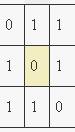

In [ ]:
def cons_word_embedding(vectorized_sentences, window = 2) : 
  #co_occurrence_matrix = ? Write your code here
  return co_occurrence_matrix

Now that we have written the function, lets run our data through your pipeline and create the word embedding, you are free to make very small detail modifications to the code below, but **don't** change the overall structure. 

In [ ]:
cleaned_text_data = clean_sentences(text_data)
tokenized_sentences = tokenizer(cleaned_text_data)
mapping = sentences_to_mapping(tokenized_sentences)
vectorized_sentences = transform_vectorize(tokenized_sentences, mapping)
co_occurrence_word_embedding = cons_word_embedding(vectorized_sentences, window = 2)
print(co_occurrence_word_embedding)

### 1.5. Analyzing the Word Embeddings
Now that we have constructed our word embedding, it is time to analyze our construct. Answer the questions below



1.   Compare this approach to other methods such as TF-IDF and Deep Learning based Word Embeddings, how are they different? what are the advantages and the disadvantages of each approach?
2.   How would you handle Out-of-Vocabulary words in this approach? Give 2 solutions and discuss their feasibility as well as their advantages and disadvantages.



Type Your Answer Here: 

## Exercise 2: Correcting the Statistical Word Embedding
So far, we have managed to create our own word embedding, good job :). In this part, we are going to discuss the shortcomings of our current approach and try to ameliorate it with some simple solutsions. 

### 2.1. Problems with the Current Word Embedding 

Answer the questions below 

1 - Note that right now, each embedding of an arbitrary word is $N$ dimensional. Discuss why this can be a problem? Does an arbitrarily large word embedding result in better model performance? Discuss your answer and mention why you think your answer is the case. 

2 - Suppose that you have created a word embedding $W$ matrix from an arbitrary dataset. You now wish to use your dataset in a real Deep Learning model. Is it a good idea to further train your statistical word embedding in a downstream Deep Learning task? Why?

Type your Answer Here: 

### 2.2. Dimension Reduction 

In this question, we wish to reduce the dimensionality of our word embeddings such that they are more in line with modern word embeddings. 

Complete the function below such that given a word embedding of size $N \times N$, a word embedding of size $N \times X$ is returned with $X < N$. 

Hint: For this purpose, explore  PCA and TruncatedSVD

In [ ]:
def reduce_dimension(embeddings, x = 64) : 
  #reduced_embeddings = ? Write your code here
  return reduced_embeddings
#Give an example here that showcases the result of your code

### 2.3. Visualizing the word embeddings  

Remember that a good word embedding is a one that carries the meanings of the words in itself. Here, we want to visualize the word embedding that have created and analyze the spatial positions of each word. 

Complete the function below such that given a word embedding matrix, the data points are plotted in a 2D space. 

Hint: You have to use the "reduce_dimension" function to draw and the mapping that we created in the previous question to understand the mapping between data points and words. 

Your final plot should be similar to this plot. 

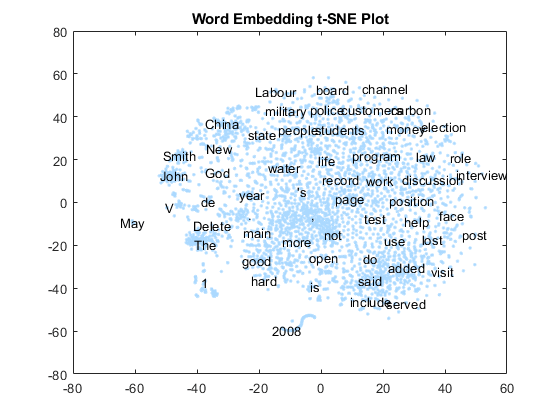

In [ ]:
from matplotlib import pyplot as plt 
def plot_embeddings(word_embeddings) : 
  #plot your embeddings here
plot_embeddings(co_occurrence_word_embedding)

Having visualized our word embedding, it is easier to analyze its properties and talk about its qualities. 

Answer the questions below based on your plot. 



1.   What words are clustered together? What words are not? give 3 pairs of words that you think are correctly clustered together and 3 pairs of words that you think should be clustered together but are not.
2.   Why do you think some related words are not clustered together? How do you think we can solve this problem?



Type your Answer Here:

## Exercise 3: Bias in Word Embeddings

We have learned in the class that word embeddings might have social biases in them. That is, the embeddings of the words might carry biases from real life (they might have sexist, racist, and stereotypical implications). 

In this exercise, we will try to see these biases with our own eyes, first in Word2Vec embeddings, and then in the word embedding that we have created ourselves. 

### 3.1. Bias in Glove

We first start by having some fun with Glove embeddings and trying to find the bias in the embeddings. 

To start off, run the code below to load the embeddings.

In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec
word_vectors = api.load('glove-wiki-gigaword-100')

Now that we have loaded the embeddings, run the code below to see an example of the bias. To this end, we will make use of the analogy task, that is, we ask our model the following question: 

X to Y is like Z to what? 

If you are not familiar with this task, feel free to google it. It is a well known that and you must use it in this question.

In [ ]:
result = word_vectors.most_similar(positive=['engineer', 'woman'], negative=['man'])
most_similar_key, similarity = result[0]
print(f"{most_similar_key}: {similarity:.4f}")

technician: 0.6620


Observe that the Glove word embeddings associate the word "woman" with "technician" when asked the question 

man to engineer is like woman to what? 

This is a blatant example of gender bias. In an ideal world, we would expect the model to make no association between the gender and the job, returning engineer instead. 

Having this knowledge,  answer the following questions: 



1.   Find 6 triplets of words for which you believe a form of bias is observable. You may use the code snippet above and replace the words with your own. Make sure that your answer contains both the analogy question as well as the answer, and the form of bias that you think is blatant.
2.   What do you think the reason behind this bias is? Propose a method by which you think we can mitigate this bias. Explain your answer in detail.



Type Your Answer Here: 

###  3.2. Bias in Our Own Word Embedding

Now that we have observed the bias in a more common word embedding, lets see if we can find any social biases in our own word embedding. 

Complete the function below such that given a word embedding, a triplet of words, and a mapping of words, the function returns the 5 most probable answers in the format {word : probability score}. 

Hint: You have to use the word embedding that we have created, the mapping that we created, and a similarity metric to find the words that are most probable.

In [ ]:
def analogy(embedding, word_1, word_2, word_3, mapping) :
  most_similar = {}
  #most_similar = ? Write your code here 
  return most_similar
#Give an example here that showcases the result of your code

Good job, you have now made your own analogy function. 
With this function at hand, answer the following questions: 



1.   Can you find 3 triplets of words in our own word embedding for which a blatant bias is observable? If yes, write the question, the answer, and the type of the bias that you think is observable. If not, explain the reason why our word embedding has no such biases? 
2.   Name 2 more tasks by which we can understand if our model is biased, explain why you think these tasks are a good fit for understanding the bias in models.



Type Your Answer Here: 

## Exercise 4: Using the Word Embeddings

In this exercise, we are going to directly use what we have learned so far in the classroom and through this homework. More precisely, we are going to try and develop a model that makes use of a word embedding to make its predictions.

To start, we download and do an initial preprocessing on the SMSSPAMCollection dataset, which contains around 6000 samples tagged either as "ham" (or 0) and "spam" (1). 
Run the cell below to download the dataset.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip -d /content/Data
clear_output()

Now that we have downloaded the dataset, lets load it into a dataframe using pandas. Run the cell below to do that. 

In [ ]:
data = pd.read_csv('/content/Data/SMSSpamCollection', sep = '\t', header = None)

Great, we have now loaded the dataset as a pandas dataframe. Note that our labels are in the string format, we don't want that. Run the cell below to 


1.   Return the text and the labels as numpy arrays
2.   Convert the labels to the integer format



In [ ]:
text_data = list(data[1])
def str_label_to_num(label_list, label_0) : 
  '''
  label_list = the list of labels that you have
  label_0 = the label (in the string format) that you want to convert into the integer 0
  '''
  labels_in_num = []
  for i in label_list : 
    if i == label_0 : 
      labels_in_num.append(0)
    else : 
      labels_in_num.append(1)
  return labels_in_num
label_list = list(data[0])
label_list = str_label_to_num(label_list, 'ham')
text_data = np.array(text_data)
label_list = np.array(label_list)

### 4.1. Readying the Data for Training

Now that we have loaded the data, we need to ready it for the training process. 


Using the functions that we determined in the first exercise, clean the data (text_data), and tokenize it to a list of lists with each word tokenized. 

In [ ]:
# Write your code here

Good job :). Now, we need to split the data so we can use it both for training and testing. 

Complete the function below such that given two lists (or numpy arrays), It splits the data into training and test sets, with training set being 80% of the entire data set and test set being 20% of the entire dataset.

In [ ]:
def split(text_data,label_list) : 
  #Write your code below
  #train_text = ?
  #test_text = ?
  #train_labels = ?
  #test_labels = ? 
  return train_text, test_text, train_labels, test_labels 
train_text, test_text, train_labels, test_labels = split(text_data,label_list)

Great, now we have out data cleaned, tokenized, and split into two sets that we can use for training and testing. Let's get to work. 

### 4.2 Utilizing our Word Embedding

The ultimate goal of a word embedding is to ease the training process by providing meaningful representations of the words to our model. At this stage, we will attempt to develop a model using the word embedding that we made. 

To start, we need to vectorize our dataset, and create a mapping just like we did before. 

Write a code below such that for our new dataset, a word mapping dictionary is created, mapping each word in the dataset to an integer. Then, vectorize the sentences, replacing each word with the corresponding integer. 

Hint: The mapping dictionary must be shared between train, and test sets. 

In [ ]:
mapping = {}
train_text_vectorized = np.array([])
test_text_vectorized = np.array([])
#Write your code here

Now that we have created our mapping, the next step is to define an embedding matrix which we will use as our input to the model. 

Complete the function below such that given a pre-trained word embedding and a mapping that maps each word to an integer, an embedding matrix is returned such that the word $W$ that maps to the integer $i$ in the mapping, takes the $i_{th}$ column in the matrix, with its rows equal to the corresponding values in the word embedding. 

Hint: You also have to take into account the Out-Of-Vocabulary words and Padding. Make sure to create your embedding matrix in a way that if a word is not in the word embedding, the embedding matrix can handle that. 

In [ ]:
def create_emb_matrix(word_embedding, mapping, dim) : 
  embedding_matrix = np.zeros((len(mapping),dim))
  #Write your code here 
  return embedding_matrix

Great Job. :) 

Now that we have created our embedding matrix, notice that we could use the original word embedding without creating the matrix and vectorizing the sets based on the positions in the original word embedding. What do you think is the problem with this approach? Do you think there will be any performance drops if we use this approach? Explain your answer. 

Type Your Answer Here: 

We have our train and test sets ready, sentences vectorized, and embedding matrix constructed. Now we can start the training process.

The first step is to create a deep learning model. 

Complete the function below, according to what we have learned in the class, that we can use to create a model to train our data.

Your code must: 


1.   Have an embedding layer which utilizes our embedding matrix and is frozen (not trainable)
2.   Have a single binary output (our labels are binary)

Note: You may use any framework that you wish. But we recommend using either Pytorch or Tensorflow/Keras so we can help if you encounter any problems. 



In [ ]:
def create_model(embedding_matrix) : 
  #Write your code here
  return model
model = model 

Great. :) Now we have a model that we can use for training. 

In this step, we train our model on the train dataset, and use our test set to validate the model. 

Write a code below that uses train text and train_labels for training, and test text and test_labels for validation. Run your code for the specified number of epochs. 

Note: Remember that you can't use the string text for training, you have to use the vectorized versions. 

Note II: Utilize the provided parameters for your training. You can customize everything else. 

In [ ]:
#@title Parameters (Don't Change)
Epoch = 5 #@param {type:"integer"}
learning_rate = 0.001 #@param {type:'number'}
#Write your code here

### 4.3 Utilizing Pre-Trained Word Embeddings

Now that we have trained our very own NLP model and got familiar with the process. We can try at our hand in using a real, large scale pre-trained word embedding.

For this task, we are going to use Glove word embeddings. Run the cell below to download it. 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip
clear_output()

Now that we have downloaded our word embeddings, we need a dictionary that maps each word to its representation using the embedding file, run the cell below to construct this mapping. 

In [ ]:
import os
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


Now that we have created our dictionary, lets look at a simple example and see how each word is mapped to its corresponding representation. 

In [ ]:
embeddings_index['cat']

array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

Observe that the word "cat" maps to a 100 dimensional space, representing the word in a vector space. 

Now that we have our embedding dictionary, write a code a below such that you retrrain a model on the same data, but with the help of this pre-trained embedding. Here is a breakdown of things that you must do: 



1.   Create a word embedding matrix from the vectorized data, such that the $i_{th}$ element of the matrix corresponds to the $i_{th}$ word in the vetorization mapping, and its columns are taken from the embedding dictionary so the pre-trained embeddings are used
2.   Create the model with the same parameters as above
3.   Train and validate the model under the same conditions

Write your code below


In [ ]:
#@title Parameters (Don't Change)
Epoch = 5 #@param {type:"integer"}
learning_rate = 0.001 #@param {type:'number'}
#glove_embedding_matirx = ? Define the embedding matrix here 
model = create_model(glove_embedding_matrix)
#Train and validate your model here 

### 4.4 Comparing the models

Great job. So far, you have created your own word embedding, analyzed it, and trained two models using your own word embedding and a pre-trained one. In this exercise, we will discuss the differences between the model trained on our own word embedding and the model trained on a pre-trained word embedding. 

Answer the questions below. 



1.   Observe the performance difference between the two models, which model performs better under the same condition? Why do you think this is the case? Is this different from what you expected? 
2.   Propose a method by which we can increase the performance of the model that has a lower performance. Explain your answer and reasoning. 
3.   How much of a role do you think the data plays in the performance of a word embedding? What kinds of data are the best for constructing word embeddings?
4.   Do you think that it is the case that different word embeddings might have different performances in different tasks? Explain your answer. Give examples to justify your answer.



Type Your Answer Here: 

## Exercise 5: Understanding Word2Vec

Prior to Transformer models, pre-trained word embeddings were the go-to architectures to achieve state-of-the-art performance. Although their effectiveness has diminished in the recent years, it is still valuable to learn their inner workings as they cary lots of ideas that can be used even today and in your research. 

In this exercise, we are going to read a bit about Word2Vec, understand how it works, and hypothesize about its properties. 

 

###5.1 The inner workings of Word2Vec

Read [this paper](https://arxiv.org/abs/1301.3781) carefully which explains how Word2Vec was developed and what its capabilities are. Then, Answer the questions below in detail. 



1.   Give a brief overview of the paper. What were the goals and concerns behind the project? Did the authors manage to achieve their goals? What do you think are the advantages and the shortcomings of Word2Vec? Limit your answer to 5-7 lines. 
2.   What are the tasks by which Word2Vec representations can be created? Give a brief description of each and list their advantages and disadvantages. 
3.   If you were to create your own Word2Vec embeddings using a relatively small corpus, what training task would you choose? Why? Explain your answer.

Type Your Answers Here: 

### 5.2 Relations in Word2Vec

In this question, we are going to find the relations between words in a word embedding trained using Word2Vec techniques. 

Run the cell below to download a Word2Vec representation trained on Google News.

In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz
import gensim.models.keyedvectors as word2vec
model=word2vec.KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin",binary=True, limit = 40000)
clear_output()

Now, lets use the same structure as the Bias exercise to find similarities using an analogy task. Run the code below for an example.

In [ ]:
result = model.most_similar(positive=['Germany', 'Paris'], negative=['Berlin'])
most_similar_key, similarity = result[0]
print(f"{most_similar_key}: {similarity:.4f}")

France: 0.7884


Refer to page 10 of the paper to see more examples. Using the code above, answer the questions below. 



1.   Can you find 10 more triplets that hold with some of the relations in page 10? Write them down. Write both the question, and the answer.
2.   Can you find 3 triplets that you expect to hold but do not? Write them down. Write both the question, and the answer. 
3.   Why do you think that it is the case that some triplets might not hold? Can you think of a method by which we can mitigate this problem? Explain your answer.



Type Your Answer Here: 

## Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instructions:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. **Fill your information** & run the cell bellow.
4. Run **Make Submission** cell, It may take several minutes and it may ask you for your credential.
5. Run **Download Submission** cell to obtain your submission as a zip file.
6. Grab the downloaded file (`nlp_asg01__xx__xx.zip`) and hand it over in microsoft teams.





### Fill your information (Run the cell)

In [ ]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id = "" #@param {type:"string"}
student_name = "" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg02')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 
your name: 31231


### Make Submission (Run the cell)

In [ ]:
#@title Make submission
! pip install -U --quiet PyDrive > /dev/null
! pip install -U --quiet jdatetime > /dev/null

# ! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 


import os
import time
import yaml
import json
import jdatetime

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'NLP_Assignment_2'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
# repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'nlp_asg02__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'dateime': str(jdatetime.date.today()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

In [ ]:
drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']

In [ ]:
files.download(submission_file_name)